In [1]:
import os
import statistics
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np

In [2]:
instance = 'SGB128'

# CREATE TABLE FITNESS

In [3]:
def get_data_execution(path_base):
    list_best_fitness = []
    list_mean_fitness = []
    
    for i in range(10):
        exec_dir = os.path.join(path_base, f'execution_{i}')
        if os.path.exists(exec_dir):
            fitness_file = os.path.join(exec_dir, 'data_fitness.txt')
            if os.path.exists(fitness_file):
                with open(fitness_file, 'r') as file:
                    linha = file.readline().strip()
                    try:
                        best_fitness, mean_fitness, stdev_fitness = map(float, linha.split())
                        list_best_fitness.append(best_fitness)
                        list_mean_fitness.append(mean_fitness)
                    except ValueError:
                        print(f"Erro ao ler valores no arquivo {fitness_file}. Verifique o formato.")
            else:
                print(f'Arquivo {fitness_file} não encontrado na execução {i}.')
        else:
            print(f'Pasta {exec_dir} não encontrada.')
          
    if list_best_fitness:
        mean_best_fitness = statistics.mean(list_best_fitness)
        stdev_best_fitness = statistics.stdev(list_best_fitness)
    
    if list_mean_fitness:
        mean_all_fitness = statistics.mean(list_mean_fitness)
        stdev_fitness = statistics.stdev(list_mean_fitness)
        
    return mean_best_fitness, stdev_best_fitness, mean_all_fitness, stdev_fitness
        

In [5]:
if __name__ == '__main__':
    alpha_values=[1, 2.5, 5]
    beta_values=[1, 2.5, 5]
    Q_values=[100, 200, 500]
    refresh_rate_values=[0.001, 0.1]
    evaporation_rate_values=[0.005, 0.5]
    dataset = {'Alfa': [], 'Beta': [], 'Q': [], 'Taxa de Atualização': [], 'Taxa de Evaporação': [],
               'Melhor Aptidão - Média': [], 'Melhor Aptidão - Desvio Padrão': [],
               'Aptidão Média - Média': [], 'Aptidão Média - Desvio Padrão': []}
    for alpha in alpha_values:
        for beta in beta_values:
            for q_value in Q_values:
                for refresh in refresh_rate_values:
                    for evap in evaporation_rate_values:
                        path_base = f'output/{instance}/a{alpha}_b{beta}_Q{q_value}_r{refresh}_e{evap}'
                        mean_best_fitness, stdev_best_fitness, mean_all_fitness, stdev_fitness = get_data_execution(path_base)
                        dataset['Alfa'].append(alpha)
                        dataset['Beta'].append(beta)
                        dataset['Q'].append(q_value)
                        dataset['Taxa de Atualização'].append(refresh)
                        dataset['Taxa de Evaporação'].append(evap)
                        dataset['Melhor Aptidão - Média'].append(mean_best_fitness)
                        dataset['Melhor Aptidão - Desvio Padrão'].append(stdev_best_fitness)
                        dataset['Aptidão Média - Média'].append(mean_all_fitness)
                        dataset['Aptidão Média - Desvio Padrão'].append(stdev_fitness)

In [6]:
df = pd.DataFrame(dataset)
df.head(10)

,Alfa,Beta,Q,Taxa de Atualização,Taxa de Evaporação,Melhor Aptidão - Média,Melhor Aptidão - Desvio Padrão,Aptidão Média - Média,Aptidão Média - Desvio Padrão
0,1.0,1.0,100,0.001,0.005,24993.0,0.000000,24993.000000,0.000000
1,1.0,1.0,100,0.001,0.500,24993.0,0.000000,24993.000000,0.000000
2,1.0,1.0,100,0.100,0.005,22222.3,453.518112,25058.828906,268.873925
3,1.0,1.0,100,0.100,0.500,21970.0,729.112550,23148.072656,679.536793
4,1.0,1.0,200,0.001,0.005,24993.0,0.000000,24993.000000,0.000000
5,1.0,1.0,200,0.001,0.500,24993.0,0.000000,24993.000000,0.000000
6,1.0,1.0,200,0.100,0.005,21611.7,546.742281,24503.727344,361.145169
7,1.0,1.0,200,0.100,0.500,21842.5,438.157316,22763.331250,472.129055
8,1.0,1.0,500,0.001,0.005,24993.0,0.000000,24993.000000,0.000000
9,1.0,1.0,500,0.001,0.500,24993.0,0.000000,24993.000000,0.000000


In [7]:
df_sorted = df.sort_values(by='Melhor Aptidão - Média', ascending=True)
df_sorted.head(5)

,Alfa,Beta,Q,Taxa de Atualização,Taxa de Evaporação,Melhor Aptidão - Média,Melhor Aptidão - Desvio Padrão,Aptidão Média - Média,Aptidão Média - Desvio Padrão
30,1.0,5.0,200,0.1,0.005,21484.2,687.665261,26122.933594,415.294799
22,1.0,2.5,500,0.1,0.005,21510.6,426.473967,24749.614844,379.900438
106,5.0,5.0,500,0.1,0.005,21513.6,578.567042,24013.725000,402.198122
27,1.0,5.0,100,0.1,0.500,21593.9,625.422071,24815.589062,766.017578
6,1.0,1.0,200,0.1,0.005,21611.7,546.742281,24503.727344,361.145169


In [8]:
df_sorted = df_sorted.round(3)
df_sorted.to_csv(f'output/{instance}/table_fitness.csv')

# CREATE GRAPHICS

In [9]:
base_directory = f'output/{instance}/a1_b5_Q200_r0.1_e0.005/'  

In [10]:
def read_data_fitness(directory):
    generations = []
    best_fitness = []
    worst_fitness = []
    mean_fitness = []
    median_fitness = []

    file_path = os.path.join(directory, 'data_generation.txt')

    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            for line in file:
                parts = line.split()
                generation = int(parts[0])  # generation
                best = float(parts[1])  # best fitness
                worst = float(parts[2])  # worst fitness
                mean = float(parts[3])  # mean fitness
                median = float(parts[4])  # median fitness
                generations.append(generation)
                best_fitness.append(best)
                worst_fitness.append(worst)
                mean_fitness.append(mean)
                median_fitness.append(median)
    return generations, best_fitness, worst_fitness, mean_fitness, median_fitness



In [11]:
def plot_fitness_evolution(base_dir, num_executions=10):
    plt.figure(figsize=(10, 6))  
    for execution_num in range(num_executions):
        execution_dir = os.path.join(base_dir, f'execution_{execution_num}')
        generations, best_fitness, _, _, _ = read_data_fitness(execution_dir)
        plt.plot(generations, best_fitness, label=f'Execution {execution_num}')

    plt.title('Evolução do Melhor Fitness por Geração')
    plt.xlabel('Geração')
    plt.ylabel('Melhor Fitness')
    plt.legend()
    plt.show()

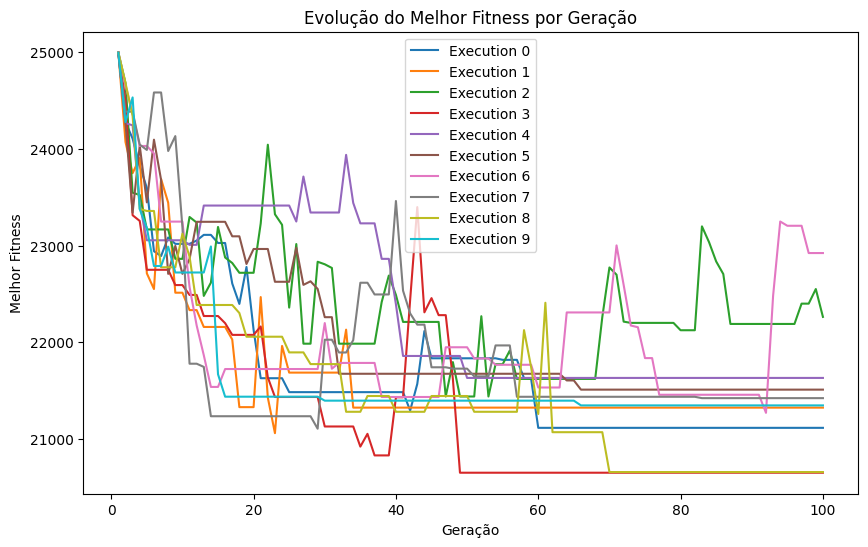

In [12]:
plot_fitness_evolution(base_directory, num_executions=10)

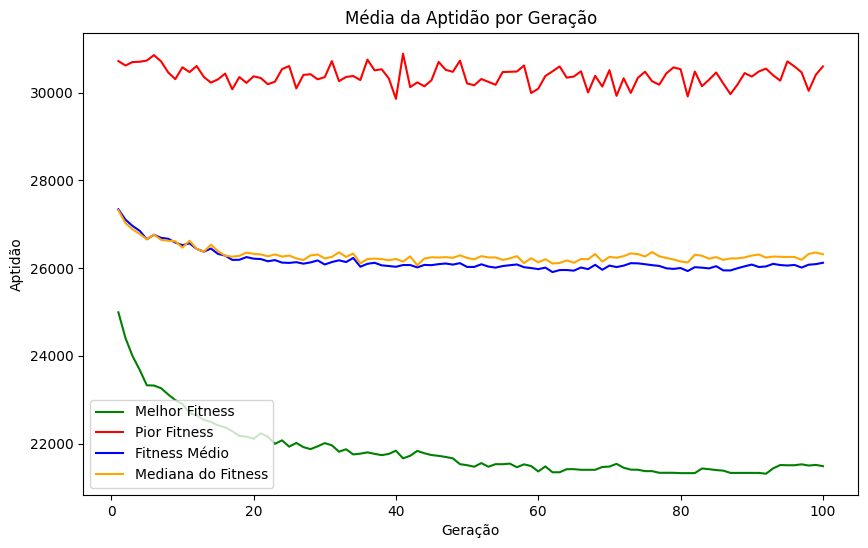

In [13]:
def calculate_values_by_generation(base_dir, num_executions=10):
    all_best_fitness = []
    all_worst_fitness = []
    all_mean_fitness = []
    all_median_fitness = []

    for execution_num in range(num_executions):
        execution_dir = os.path.join(base_dir, f'execution_{execution_num}')
        generations, best, worst, mean, median = read_data_fitness(execution_dir)
        all_best_fitness.append(best)
        all_worst_fitness.append(worst)
        all_mean_fitness.append(mean)
        all_median_fitness.append(median)

    avg_best_fitness = np.mean(all_best_fitness, axis=0)
    avg_worst_fitness = np.mean(all_worst_fitness, axis=0)
    avg_mean_fitness = np.mean(all_mean_fitness, axis=0)
    avg_median_fitness = np.mean(all_median_fitness, axis=0)

    return generations, avg_best_fitness, avg_worst_fitness, avg_mean_fitness, avg_median_fitness

def plot_fitness_averages(base_dir, num_executions=10):
    generations, avg_best_fitness, avg_worst_fitness, avg_mean_fitness, avg_median_fitness = calculate_values_by_generation(base_dir, num_executions)

    plt.figure(figsize=(10, 6))  
    plt.plot(generations, avg_best_fitness, label='Melhor Fitness', color='g')
    plt.plot(generations, avg_worst_fitness, label='Pior Fitness', color='r')
    plt.plot(generations, avg_mean_fitness, label='Fitness Médio', color='b')
    plt.plot(generations, avg_median_fitness, label='Mediana do Fitness', color='orange') 
    plt.title('Média da Aptidão por Geração')
    plt.xlabel('Geração')
    plt.ylabel('Aptidão')
    plt.legend()
    plt.show()

plot_fitness_averages(base_directory, num_executions=10)
